In [2]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [3]:
analysis = scripts.Analysis()

In [5]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band05_wn_980_1100',
                          'P_50_T_250',
                          'min_7.5e-26_max_5e-22_ng_5',
                          'wgt_1_.9_.8_.7_.6',
                          'tropical')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [6]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'h2o',
                               'band05_wn_980_1100',
                               'P_50_T_250',
                               'min_7.5e-26_max_5e-22_ng_5',
                               'wgt_1_.9_.8_.7_.6',
                               'tropical')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [7]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [8]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [9]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [10]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
for g in [1, 2, 3, 4, 5]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

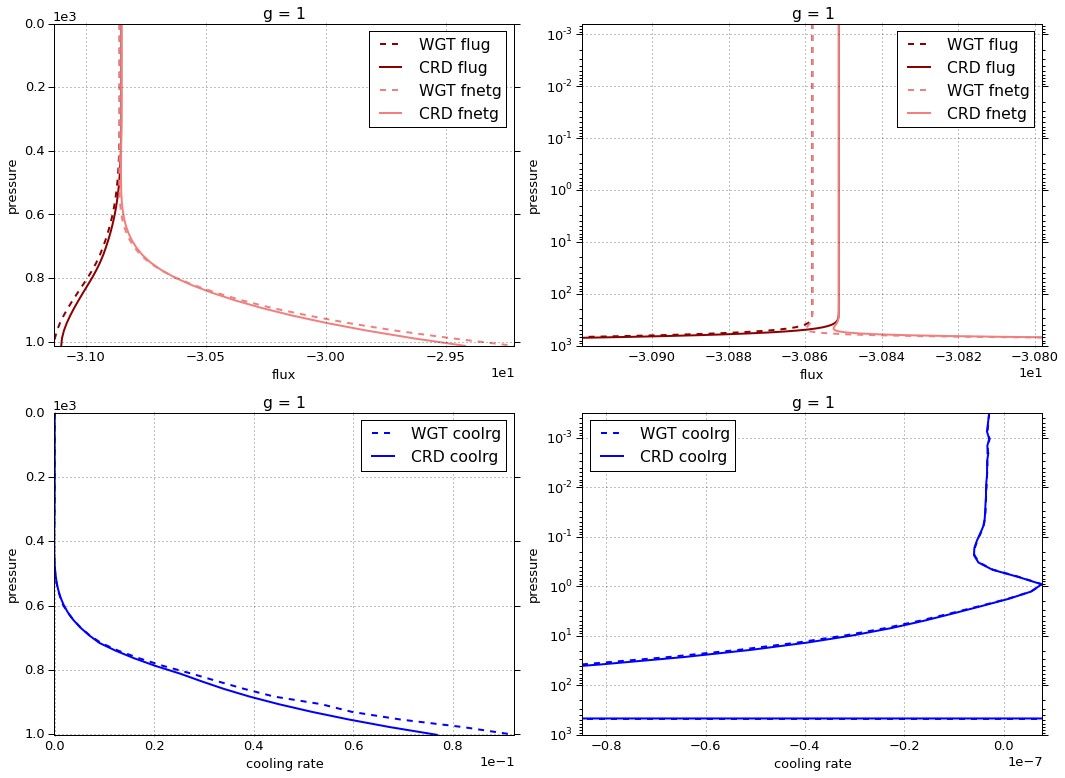

# Figure: flux, cooling rate. g-group 2

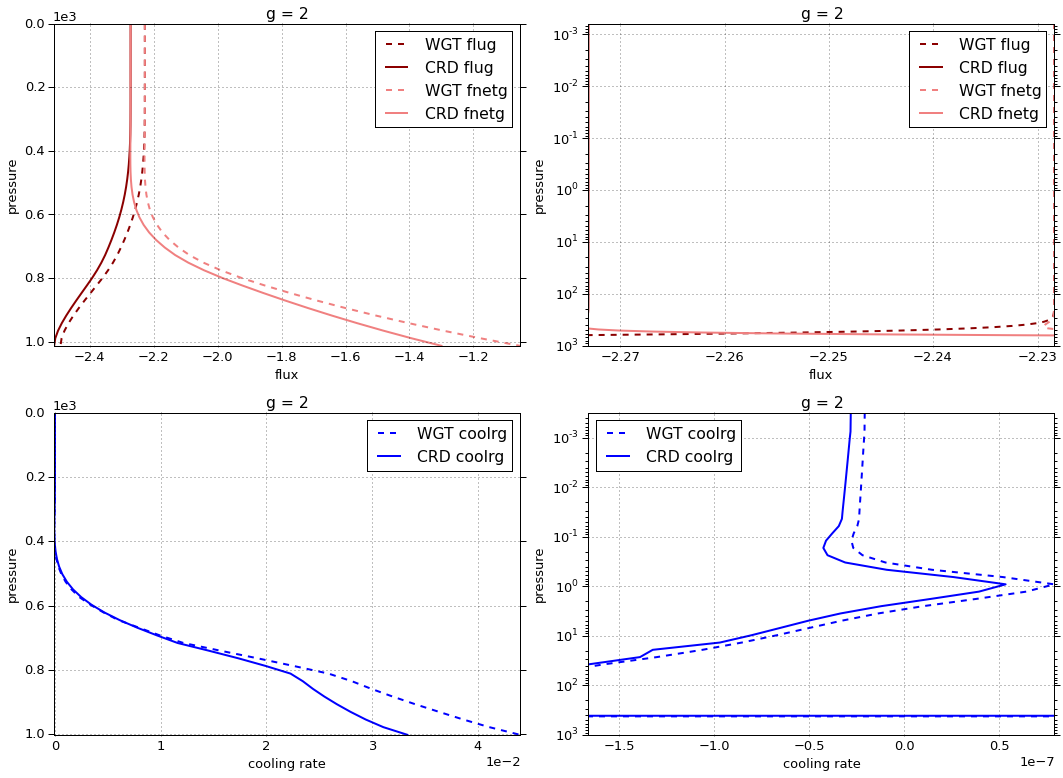

# Figure: flux, cooling rate. g-group 3

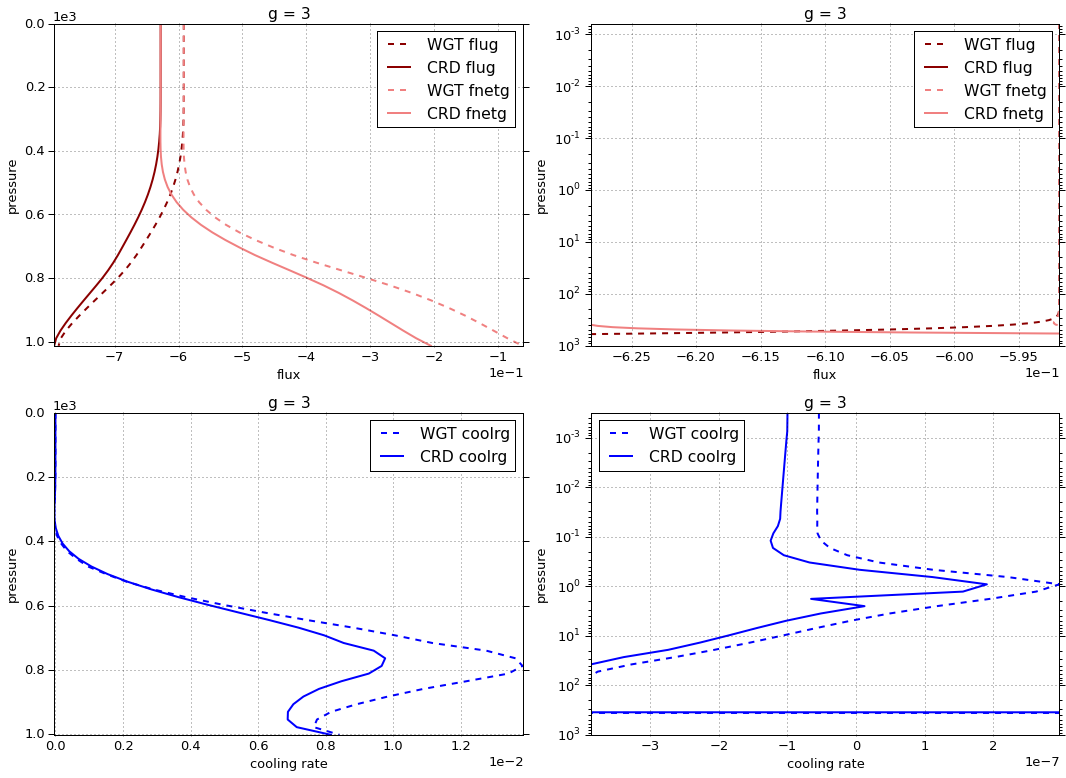

# Figure: flux, cooling rate. g-group 4

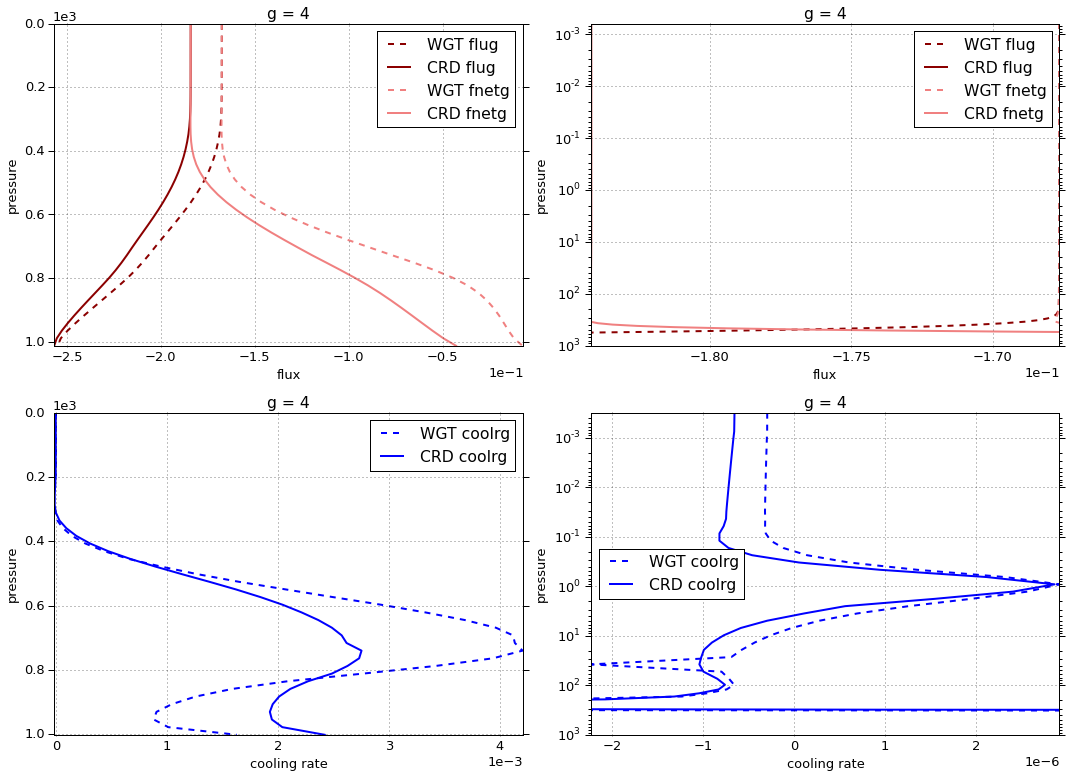

# Figure: flux, cooling rate. g-group 5

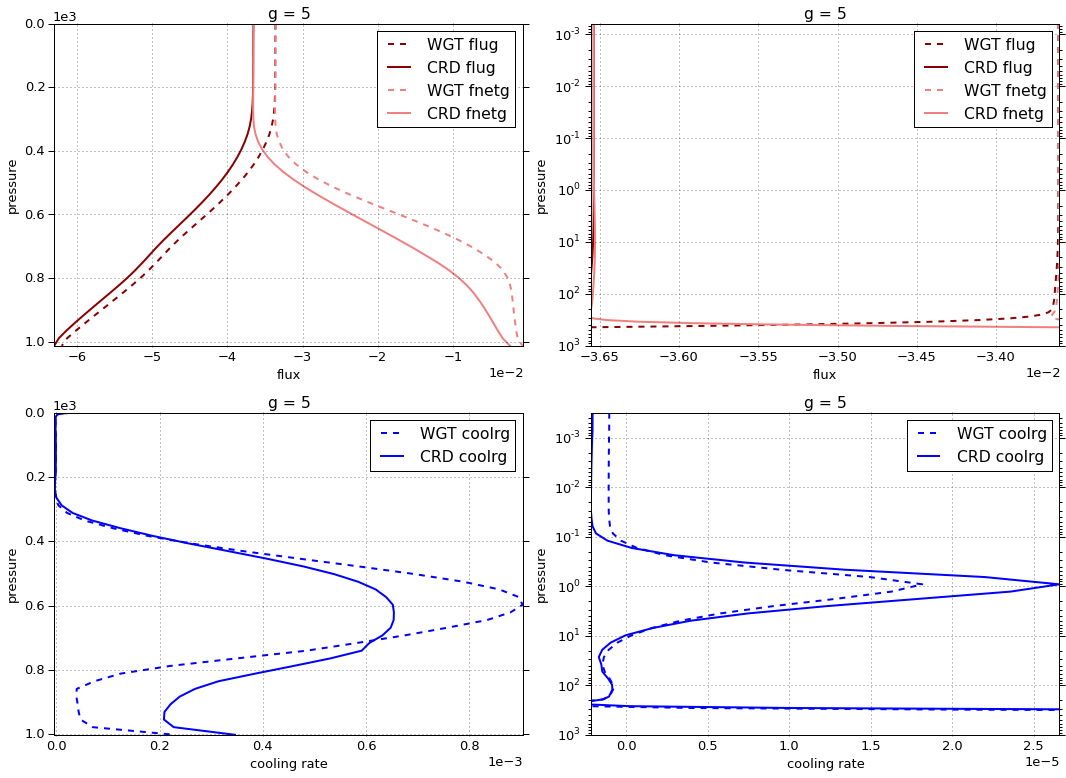

# Figure: flux, cooling rate. g-group total

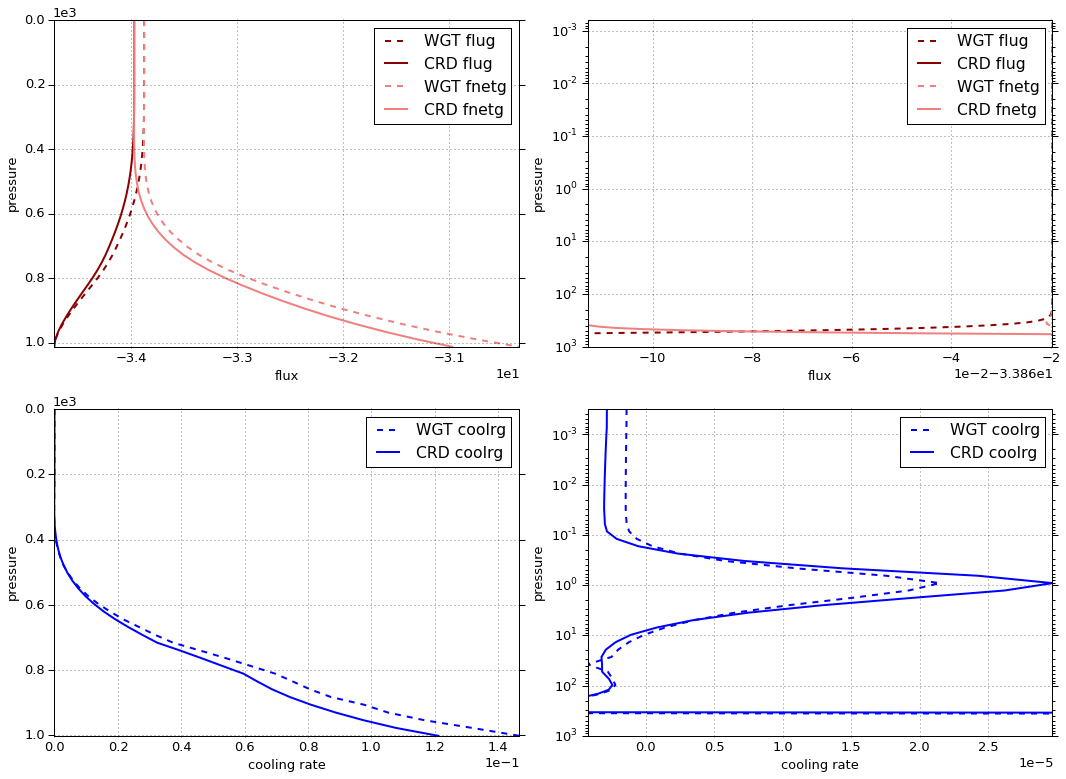

In [15]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [16]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -30.851202  0.000000 -30.851202
  1013     76    -31.101280  1.680655 -29.420626
2 0        1      -2.273053  0.000000  -2.273053
  1013     76     -2.512457  1.212917  -1.299540
3 0        1      -0.628141  0.000000  -0.628141
  1013     76     -0.794950  0.590074  -0.204876
4 0        1      -0.184210  0.000000  -0.184210
  1013     76     -0.256910  0.214013  -0.042897
5 0        1      -0.036539  0.000000  -0.036539
  1013     76     -0.063044  0.060640  -0.002404


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -30.858132  0.000000 -30.858132
  1013     76    -31.130795  1.914215 -29.216580
2 0        1      -2.228405  0.000000  -2.228405
  1013     76     -2.492712  1.439031  -1.053681
3 0        1      -0.591876  0.000000  -0.591876
  1013     76     -0.788019  0.726738  -0.061280
4 0        1      -0.167641  0.000000  -0.167641
  1013     76     -0.255090  0.247569  -0.007520
5 0        1      -0.033607  0.000000  -0.033607
  1013     76     -0.062025  0.061290  -0.000735


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1     -0.006930  0.000000 -0.006930
  1013     76    -0.029515  0.233560  0.204046
2 0        1      0.044648  0.000000  0.044648
  1013     76     0.019745  0.226113  0.245858
3 0        1      0.036265  0.000000  0.036265
  1013     76     0.006931  0.136664  0.143596
4 0        1      0.016570  0.000000  0.016570
  1013     76     0.001820  0.033557  0.035376
5 0        1      0.002932  0.000000  0.002932
  1013     76     0.001019  0.000650  0.001669

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -2.881956e-09
  1001.112500 75     7.683404e-02
2 0.000312    1     -2.818914e-08
  1001.112500 75     3.335792e-02
3 0.000312    1     -9.988531e-08
  1001.112500 75     8.153317e-03
4 0.000312    1     -6.522738e-07
  1001.112500 75     2.421838e-03
5 0.000312    1     -2.066730e-06
  1001.112500 75     3.460975e-04


WGT


coolrg
g pressure    layer              
1 0.000312    1     -2.881956e-09
  1001.112500 75     9.236163e-02
2 0.000312    1     -2.085216e-08
  1001.112500 75     4.401778e-02
3 0.000312    1     -5.407721e-08
  1001.112500 75     8.410384e-03
4 0.000312    1     -2.920825e-07
  1001.112500 75     1.630337e-03
5 0.000312    1     -1.042231e-06
  1001.112500 75     2.296329e-04


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      0.000000e+00
  1001.112500 75     1.552759e-02
2 0.000312    1      7.336981e-09
  1001.112500 75     1.065986e-02
3 0.000312    1      4.580810e-08
  1001.112500 75     2.570671e-04
4 0.000312    1      3.601913e-07
  1001.112500 75    -7.915011e-04
5 0.000312    1      1.024500e-06
  1001.112500 75    -1.164646e-04

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-33.973145,0.000000,-33.973145
1013,76,-34.728640,3.758299,-30.970342



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-33.879661,0.000000,-33.879661
1013,76,-34.728640,4.388843,-30.339797



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,9.348431e-02,0.000000,0.093484
1013,76,-1.750000e-07,0.630545,0.630545


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000003
1001.112500,75,0.121113



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.000001
1001.112500,75,0.146650



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.000001
1001.112500,75,0.025537


In [17]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.893833,0.896401
2,0.073500,0.071777
3,0.023292,0.022691
4,0.007500,0.007345
5,0.001875,0.001786


In [18]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

wgt                                           crd        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -30.858132  0.000000e+00 -30.858132   1     1   
0.000624      1     2 -30.858132  3.503123e-14 -30.858132   1     2   
0.000876      1     3 -30.858132  5.033251e-14 -30.858132   1     3   
0.001229      1     4 -30.858132  7.116962e-14 -30.858132   1     4   
0.001723      1     5 -30.858132  1.025061e-13 -30.858132   1     5   
0.002417      1     6 -30.858132  1.481736e-13 -30.858132   1     6   
0.003391      1     7 -30.858132  2.146533e-13 -30.858132   1     7   
0.004757      1     8 -30.858132  3.131662e-13 -30.858132   1     8   
0.006672      1     9 -30.858132  4.557542e-13 -30.858132   1     9   
0.009359      1    10 -30.858132  6.663894e-13 -30.858132   1    10   
0.013128      1    11 -30.858132  9.739576e-13 -30.858132   1    11   
0.018415      1    12 -30.858132  1.427286e-12 -30.858132   1    12   
0.025830      1    13 -30.858132  2.089682e-12 -30.858132   1    13   
0.036232      1    14 -30.858132  3.069536e-12 -30.858132   1    14   
0.050823      1    15 -30.858132  4.547665e-12 -30.858132   1    15   
0.071291      1    16 -30.858132  7.083722e-12 -30.858132   1    16   
0.100000      1    17 -30.858132  1.225257e-11 -30.858132   1    17   
0.140271      1    18 -30.858132  2.360408e-11 -30.858132   1    18   
0.196760      1    19 -30.858132  4.892329e-11 -30.858132   1    19   
0.275997      1    20 -30.858132  1.059486e-10 -30.858132   1    20   
0.387100      1    21 -30.858132  2.357462e-10 -30.858132   1    21   
0.543100      1    22 -30.858132  5.342154e-10 -30.858132   1    22   
0.761700      1    23 -30.858132  1.189449e-09 -30.858132   1    23   
1.068500      1    24 -30.858132  2.344030e-09 -30.858132   1    24   
1.498800      1    25 -30.858132  3.923978e-09 -30.858132   1    25   
2.102400      1    26 -30.858132  5.934216e-09 -30.858132   1    26   
2.949000      1    27 -30.858132  8.388940e-09 -30.858132   1    27   
4.136600      1    28 -30.858132  1.143408e-08 -30.858132   1    28   
5.802500      1    29 -30.858132  1.535052e-08 -30.858132   1    29   
8.139200      1    30 -30.858132  2.055072e-08 -30.858132   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -30.858487  1.371032e-04 -30.858350   1    47   
347.300000    1    48 -30.858795  2.895674e-04 -30.858506   1    48   
371.075000    1    49 -30.859294  5.686298e-04 -30.858725   1    49   
394.850000    1    50 -30.860015  1.023749e-03 -30.858991   1    50   
418.625000    1    51 -30.861024  1.740676e-03 -30.859284   1    51   
442.400000    1    52 -30.862394  2.836052e-03 -30.859557   1    52   
466.175000    1    53 -30.864222  4.465241e-03 -30.859757   1    53   
489.950000    1    54 -30.866599  6.831867e-03 -30.859767   1    54   
513.725000    1    55 -30.869620  1.019268e-02 -30.859427   1    55   
537.500000    1    56 -30.873390  1.487826e-02 -30.858511   1    56   
561.275000    1    57 -30.878007  2.129435e-02 -30.856713   1    57   
585.050000    1    58 -30.883566  2.993933e-02 -30.853627   1    58   
608.825000    1    59 -30.890360  4.142258e-02 -30.848938   1    59   
632.600000    1    60 -30.898047  5.645900e-02 -30.841588   1    60   
656.375000    1    61 -30.906867  7.589817e-02 -30.830969   1    61   
680.150000    1    62 -30.916839  1.006926e-01 -30.816147   1    62   
703.925000    1    63 -30.928161  1.318453e-01 -30.796316   1    63   
727.700000    1    64 -30.940533  1.705124e-01 -30.770021   1    64   
751.475000    1    65 -30.955394  2.213430e-01 -30.734051   1    65   
775.250000    1    66 -30.972305  2.861518e-01 -30.686153   1    66   
799.025000    1    67 -30.991393  3.667968e-01 -30.624596   1    67   
822.800000    1    68 -31.012345  4.651971e-01 -30.547148   1    68   
846.575000    1    69 -31.033294  5.

In [19]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -2.228405  0.000000e+00 -2.228405   2     1 -2.273053   
0.000624      2     2 -2.228405  3.008392e-13 -2.228405   2     2 -2.273053   
0.000876      2     3 -2.228405  4.246798e-13 -2.228405   2     3 -2.273053   
0.001229      2     4 -2.228405  6.043082e-13 -2.228405   2     4 -2.273053   
0.001723      2     5 -2.228405  8.661769e-13 -2.228405   2     5 -2.273053   
0.002417      2     6 -2.228405  1.247994e-12 -2.228405   2     6 -2.273053   
0.003391      2     7 -2.228405  1.804677e-12 -2.228405   2     7 -2.273053   
0.004757      2     8 -2.228405  2.616276e-12 -2.228405   2     8 -2.273053   
0.006672      2     9 -2.228405  3.799630e-12 -2.228405   2     9 -2.273053   
0.009359      2    10 -2.228405  5.525503e-12 -2.228405   2    10 -2.273053   
0.013128      2    11 -2.228405  8.042501e-12 -2.228405   2    11 -2.273053   
0.018415      2    12 -2.228405  1.171428e-11 -2.228405   2    12 -2.273053   
0.025830      2    13 -2.228405  1.707262e-11 -2.228405   2    13 -2.273053   
0.036232      2    14 -2.228405  2.490509e-11 -2.228405   2    14 -2.273053   
0.050823      2    15 -2.228405  3.660439e-11 -2.228405   2    15 -2.273053   
0.071291      2    16 -2.228405  5.619374e-11 -2.228405   2    16 -2.273053   
0.100000      2    17 -2.228405  9.443858e-11 -2.228405   2    17 -2.273053   
0.140271      2    18 -2.228405  1.745126e-10 -2.228405   2    18 -2.273053   
0.196760      2    19 -2.228405  3.446213e-10 -2.228405   2    19 -2.273053   
0.275997      2    20 -2.228405  7.090154e-10 -2.228405   2    20 -2.273053   
0.387100      2    21 -2.228405  1.496552e-09 -2.228405   2    21 -2.273053   
0.543100      2    22 -2.228405  3.211320e-09 -2.228405   2    22 -2.273053   
0.761700      2    23 -2.228405  6.770906e-09 -2.228405   2    23 -2.273053   
1.068500      2    24 -2.228405  1.273979e-08 -2.228405   2    24 -2.273053   
1.498800      2    25 -2.228405  2.050457e-08 -2.228405   2    25 -2.273053   
2.102400      2    26 -2.228405  2.977847e-08 -2.228405   2    26 -2.273053   
2.949000      2    27 -2.228405  4.025498e-08 -2.228405   2    27 -2.273053   
4.136600      2    28 -2.228405  5.213646e-08 -2.228405   2    28 -2.273053   
5.802500      2    29 -2.228405  6.603549e-08 -2.228405   2    29 -2.273053   
8.139200      2    30 -2.228405  8.285035e-08 -2.228405   2    30 -2.273053   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -2.228932  2.486302e-04 -2.228683   2    47 -2.273578   
347.300000    2    48 -2.229371  5.189272e-04 -2.228852   2    48 -2.274012   
371.075000    2    49 -2.230077  1.006959e-03 -2.229071   2    49 -2.274696   
394.850000    2    50 -2.231055  1.791664e-03 -2.229263   2    50 -2.275656   
418.625000    2    51 -2.232421  3.009550e-03 -2.229411   2    51 -2.276963   
442.400000    2    52 -2.234207  4.841370e-03 -2.229365   2    52 -2.278693   
466.175000    2    53 -2.236518  7.520636e-03 -2.228997   2    53 -2.280921   
489.950000    2    54 -2.239460  1.134275e-02 -2.228117   2    54 -2.283726   
513.725000    2    55 -2.243067  1.666372e-02 -2.226403   2    55 -2.287181   
537.500000    2    56 -2.247490  2.392014e-02 -2.223570   2    56 -2.291351   
561.275000    2    57 -2.252767  3.361245e-02 -2.219155   2    57 -2.296293   
585.050000    2    58 -2.258896  4.623261e-02 -2.212663   2    58 -2.302040   
608.825000    2    59 -2.265990  6.277822e-02 -2.203212   2    59 -2.308614   
632.600000    2    60 -2.274003  8.370991e-02 -2.190293   2    60 -2.316004   
656.375000    2    61 -2.282956  1.095272e-01 -2.173428   2    61 -2.324171   
680.150000    2    62 -2.292761  1.417263e-01 -2.151035   2    62 -2.333058   
703.925000    2    63 -2.303384  1.802729e-01 -2.123111   2   

In [20]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -0.591876  0.000000e+00 -0.591876   3     1 -0.628141   
0.000624      3     2 -0.591876  1.029881e-12 -0.591876   3     2 -0.628141   
0.000876      3     3 -0.591876  1.452959e-12 -0.591876   3     3 -0.628141   
0.001229      3     4 -0.591876  2.064538e-12 -0.591876   3     4 -0.628141   
0.001723      3     5 -0.591876  2.952966e-12 -0.591876   3     5 -0.628141   
0.002417      3     6 -0.591876  4.243335e-12 -0.591876   3     6 -0.628141   
0.003391      3     7 -0.591876  6.117813e-12 -0.591876   3     7 -0.628141   
0.004757      3     8 -0.591876  8.840729e-12 -0.591876   3     8 -0.628141   
0.006672      3     9 -0.591876  1.279624e-11 -0.591876   3     9 -0.628141   
0.009359      3    10 -0.591876  1.854289e-11 -0.591876   3    10 -0.628141   
0.013128      3    11 -0.591876  2.689249e-11 -0.591876   3    11 -0.628141   
0.018415      3    12 -0.591876  3.902653e-11 -0.591876   3    12 -0.628141   
0.025830      3    13 -0.591876  5.666513e-11 -0.591876   3    13 -0.628141   
0.036232      3    14 -0.591876  8.234593e-11 -0.591876   3    14 -0.628141   
0.050823      3    15 -0.591876  1.205117e-10 -0.591876   3    15 -0.628141   
0.071291      3    16 -0.591876  1.833292e-10 -0.591876   3    16 -0.628141   
0.100000      3    17 -0.591876  3.018743e-10 -0.591876   3    17 -0.628141   
0.140271      3    18 -0.591876  5.403110e-10 -0.591876   3    18 -0.628141   
0.196760      3    19 -0.591876  1.026664e-09 -0.591876   3    19 -0.628141   
0.275997      3    20 -0.591876  2.026784e-09 -0.591876   3    20 -0.628141   
0.387100      3    21 -0.591876  4.101606e-09 -0.591876   3    21 -0.628141   
0.543100      3    22 -0.591876  8.438708e-09 -0.591876   3    22 -0.628141   
0.761700      3    23 -0.591876  1.712299e-08 -0.591876   3    23 -0.628141   
1.068500      3    24 -0.591876  3.157813e-08 -0.591876   3    24 -0.628141   
1.498800      3    25 -0.591876  5.077539e-08 -0.591876   3    25 -0.628141   
2.102400      3    26 -0.591876  7.441357e-08 -0.591876   3    26 -0.628141   
2.949000      3    27 -0.591876  1.020831e-07 -0.591876   3    27 -0.628141   
4.136600      3    28 -0.591876  1.344821e-07 -0.591876   3    28 -0.628141   
5.802500      3    29 -0.591876  1.733439e-07 -0.591876   3    29 -0.628141   
8.139200      3    30 -0.591876  2.211915e-07 -0.591876   3    30 -0.628141   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -0.592674  4.924281e-04 -0.592182   3    47 -0.628938   
347.300000    3    48 -0.593286  1.002974e-03 -0.592283   3    48 -0.629540   
371.075000    3    49 -0.594203  1.899275e-03 -0.592303   3    49 -0.630444   
394.850000    3    50 -0.595466  3.298472e-03 -0.592168   3    50 -0.631660   
418.625000    3    51 -0.597097  5.402369e-03 -0.591694   3    51 -0.633239   
442.400000    3    52 -0.599184  8.458583e-03 -0.590726   3    52 -0.635236   
466.175000    3    53 -0.601768  1.280437e-02 -0.588964   3    53 -0.637694   
489.950000    3    54 -0.604911  1.866162e-02 -0.586250   3    54 -0.640649   
513.725000    3    55 -0.608638  2.662070e-02 -0.582018   3    55 -0.644129   
537.500000    3    56 -0.612996  3.692610e-02 -0.576070   3    56 -0.648144   
561.275000    3    57 -0.617999  5.010922e-02 -0.567890   3    57 -0.652694   
585.050000    3    58 -0.623563  6.653093e-02 -0.557032   3    58 -0.657755   
608.825000    3    59 -0.629689  8.661120e-02 -0.543078   3    59 -0.663286   
632.600000    3    60 -0.636315  1.105906e-01 -0.525724   3    60 -0.669220   
656.375000    3    61 -0.643390  1.386608e-01 -0.504730   3    61 -0.675465   
680.150000    3    62 -0.650709  1.708180e-01 -0.479891   3    62 -0.681908   
703.925000    3    63 -0.658269  2.067022e-01 -0.451567   3   

In [21]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -0.167641  0.000000e+00 -0.167641   4     1 -0.184210   
0.000624      4     2 -0.167641  6.956368e-12 -0.167641   4     2 -0.184210   
0.000876      4     3 -0.167641  9.823061e-12 -0.167641   4     3 -0.184210   
0.001229      4     4 -0.167641  1.399345e-11 -0.167641   4     4 -0.184210   
0.001723      4     5 -0.167641  2.009186e-11 -0.167641   4     5 -0.184210   
0.002417      4     6 -0.167641  2.900639e-11 -0.167641   4     6 -0.184210   
0.003391      4     7 -0.167641  4.203822e-11 -0.167641   4     7 -0.184210   
0.004757      4     8 -0.167641  6.108866e-11 -0.167641   4     8 -0.184210   
0.006672      4     9 -0.167641  8.893496e-11 -0.167641   4     9 -0.184210   
0.009359      4    10 -0.167641  1.296387e-10 -0.167641   4    10 -0.184210   
0.013128      4    11 -0.167641  1.891362e-10 -0.167641   4    11 -0.184210   
0.018415      4    12 -0.167641  2.761101e-10 -0.167641   4    12 -0.184210   
0.025830      4    13 -0.167641  4.032612e-10 -0.167641   4    13 -0.184210   
0.036232      4    14 -0.167641  5.894015e-10 -0.167641   4    14 -0.184210   
0.050823      4    15 -0.167641  8.679119e-10 -0.167641   4    15 -0.184210   
0.071291      4    16 -0.167641  1.337623e-09 -0.167641   4    16 -0.184210   
0.100000      4    17 -0.167641  2.264409e-09 -0.167641   4    17 -0.184210   
0.140271      4    18 -0.167641  4.210789e-09 -0.167641   4    18 -0.184210   
0.196760      4    19 -0.167641  8.308573e-09 -0.167641   4    19 -0.184210   
0.275997      4    20 -0.167641  1.688979e-08 -0.167641   4    20 -0.184210   
0.387100      4    21 -0.167641  3.475379e-08 -0.167641   4    21 -0.184211   
0.543100      4    22 -0.167641  7.165108e-08 -0.167641   4    22 -0.184211   
0.761700      4    23 -0.167641  1.436350e-07 -0.167641   4    23 -0.184211   
1.068500      4    24 -0.167641  2.602266e-07 -0.167641   4    24 -0.184211   
1.498800      4    25 -0.167641  4.111158e-07 -0.167640   4    25 -0.184211   
2.102400      4    26 -0.167641  5.905020e-07 -0.167640   4    26 -0.184211   
2.949000      4    27 -0.167641  7.902011e-07 -0.167640   4    27 -0.184211   
4.136600      4    28 -0.167641  1.008562e-06 -0.167640   4    28 -0.184211   
5.802500      4    29 -0.167641  1.249069e-06 -0.167640   4    29 -0.184212   
8.139200      4    30 -0.167642  1.517300e-06 -0.167640   4    30 -0.184212   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -0.168372  5.610219e-04 -0.167811   4    47 -0.184933   
347.300000    4    48 -0.168866  1.094445e-03 -0.167771   4    48 -0.185406   
371.075000    4    49 -0.169578  1.987413e-03 -0.167590   4    49 -0.186078   
394.850000    4    50 -0.170500  3.318158e-03 -0.167182   4    50 -0.186934   
418.625000    4    51 -0.171653  5.219829e-03 -0.166433   4    51 -0.187991   
442.400000    4    52 -0.173054  7.849101e-03 -0.165205   4    52 -0.189259   
466.175000    4    53 -0.174743  1.137797e-02 -0.163365   4    53 -0.190748   
489.950000    4    54 -0.176667  1.596170e-02 -0.160705   4    54 -0.192463   
513.725000    4    55 -0.178869  2.175464e-02 -0.157115   4    55 -0.194396   
537.500000    4    56 -0.181351  2.888033e-02 -0.152470   4    56 -0.196540   
561.275000    4    57 -0.184071  3.743495e-02 -0.146636   4    57 -0.198885   
585.050000    4    58 -0.187017  4.740885e-02 -0.139608   4    58 -0.201408   
608.825000    4    59 -0.190140  5.878552e-02 -0.131354   4    59 -0.204083   
632.600000    4    60 -0.193412  7.142790e-02 -0.121984   4    60 -0.206874   
656.375000    4    61 -0.196754  8.514707e-02 -0.111607   4    61 -0.209731   
680.150000    4    62 -0.200094  9.964905e-02 -0.100445   4    62 -0.212593   
703.925000    4    63 -0.203374  1.145257e-01 -0.088848   4   

In [22]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      5     1 -0.033607  0.000000e+00 -0.033607   5     1 -0.036539   
0.000624      5     2 -0.033607  3.517644e-11 -0.033607   5     2 -0.036539   
0.000876      5     3 -0.033607  4.976128e-11 -0.033607   5     3 -0.036539   
0.001229      5     4 -0.033607  7.102921e-11 -0.033607   5     4 -0.036539   
0.001723      5     5 -0.033607  1.021928e-10 -0.033607   5     5 -0.036539   
0.002417      5     6 -0.033607  1.478473e-10 -0.033607   5     6 -0.036539   
0.003391      5     7 -0.033607  2.147360e-10 -0.033607   5     7 -0.036539   
0.004757      5     8 -0.033607  3.127360e-10 -0.033607   5     8 -0.036539   
0.006672      5     9 -0.033607  4.563109e-10 -0.033607   5     9 -0.036539   
0.009359      5    10 -0.033607  6.666667e-10 -0.033607   5    10 -0.036539   
0.013128      5    11 -0.033607  9.748795e-10 -0.033607   5    11 -0.036539   
0.018415      5    12 -0.033607  1.426523e-09 -0.033607   5    12 -0.036539   
0.025830      5    13 -0.033607  2.088444e-09 -0.033607   5    13 -0.036539   
0.036232      5    14 -0.033607  3.059923e-09 -0.033607   5    14 -0.036539   
0.050823      5    15 -0.033607  4.517709e-09 -0.033607   5    15 -0.036539   
0.071291      5    16 -0.033607  6.990832e-09 -0.033607   5    16 -0.036539   
0.100000      5    17 -0.033607  1.190683e-08 -0.033607   5    17 -0.036539   
0.140271      5    18 -0.033607  2.227335e-08 -0.033607   5    18 -0.036539   
0.196760      5    19 -0.033607  4.409566e-08 -0.033607   5    19 -0.036539   
0.275997      5    20 -0.033607  8.961415e-08 -0.033607   5    20 -0.036539   
0.387100      5    21 -0.033607  1.836719e-07 -0.033607   5    21 -0.036539   
0.543100      5    22 -0.033607  3.758893e-07 -0.033607   5    22 -0.036539   
0.761700      5    23 -0.033607  7.463444e-07 -0.033606   5    23 -0.036539   
1.068500      5    24 -0.033607  1.343348e-06 -0.033606   5    24 -0.036539   
1.498800      5    25 -0.033607  2.117731e-06 -0.033605   5    25 -0.036539   
2.102400      5    26 -0.033607  3.040558e-06 -0.033604   5    26 -0.036539   
2.949000      5    27 -0.033607  4.067280e-06 -0.033603   5    27 -0.036539   
4.136600      5    28 -0.033607  5.180612e-06 -0.033602   5    28 -0.036540   
5.802500      5    29 -0.033608  6.382896e-06 -0.033601   5    29 -0.036541   
8.139200      5    30 -0.033609  7.678023e-06 -0.033601   5    30 -0.036542   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    5    47 -0.034114  5.320746e-04 -0.033582   5    47 -0.037039   
347.300000    5    48 -0.034402  9.757865e-04 -0.033426   5    48 -0.037313   
371.075000    5    49 -0.034792  1.675732e-03 -0.033116   5    49 -0.037683   
394.850000    5    50 -0.035269  2.651146e-03 -0.032618   5    50 -0.038128   
418.625000    5    51 -0.035833  3.952246e-03 -0.031881   5    51 -0.038653   
442.400000    5    52 -0.036486  5.626406e-03 -0.030860   5    52 -0.039256   
466.175000    5    53 -0.037227  7.700854e-03 -0.029527   5    53 -0.039936   
489.950000    5    54 -0.038052  1.017895e-02 -0.027873   5    54 -0.040689   
513.725000    5    55 -0.038955  1.303864e-02 -0.025917   5    55 -0.041511   
537.500000    5    56 -0.039927  1.623275e-02 -0.023695   5    56 -0.042396   
561.275000    5    57 -0.040960  1.968297e-02 -0.021277   5    57 -0.043337   
585.050000    5    58 -0.042048  2.329418e-02 -0.018754   5    58 -0.044325   
608.825000    5    59 -0.043171  2.696109e-02 -0.016210   5    59 -0.045350   
632.600000    5    60 -0.044312  3.057939e-02 -0.013732   5    60 -0.046398   
656.375000    5    61 -0.045447  3.406474e-02 -0.011382   5    61 -0.047447   
680.150000    5    62 -0.046548  3.729954e-02 -0.009249   5    62 -0.048473   
703.925000    5    63 -0.047580  4.023303e-02 -0.007347   5   

In [23]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')